In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import keras as K

Using TensorFlow backend.


## 1-Layer Neural Network (Multi-Layer-Perceptron)
---

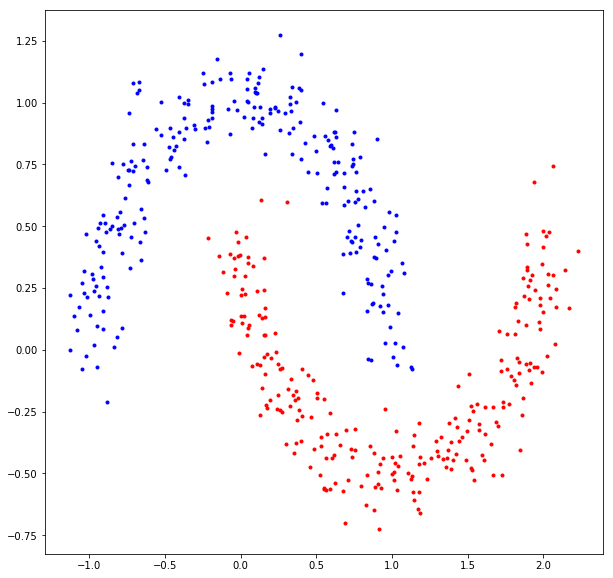

In [2]:
#--- Create a complicated dataset ---#
from sklearn.datasets import make_moons
(X,y) = make_moons(n_samples=500, shuffle=True, noise=0.1)

#--- Visualize ---#
plt.figure(figsize=(10,10))
plt.plot(X[y==0,0],X[y==0,1],'.b')
plt.plot(X[y==1,0],X[y==1,1],'.r')

In [11]:
#--- Perceptron Parameters ---#
perceptron_NHidden = 2000
batchSize = 32
epochs=100
nonlinearity = 'tanh'

#--- Create a Perceptron ---#
from keras.models import Sequential
from keras.layers import Dense, Activation

# Add a Dense layer and an Output layer
perceptron = Sequential()
perceptron.add(Dense(perceptron_NHidden, input_dim=2, activation=nonlinearity))
perceptron.add(Dense(1, activation='sigmoid'))

# Decide on the metrics for the model
perceptron.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit to the training data
p_history = perceptron.fit(X, y, epochs=epochs, batch_size=batchSize)

Epoch 1/100
500/500 [==============================] - 0s - loss: 0.4278 - acc: 0.8060     
Epoch 2/100
500/500 [==============================] - 0s - loss: 0.3105 - acc: 0.8480     
Epoch 3/100
500/500 [==============================] - 0s - loss: 0.2762 - acc: 0.8660     
Epoch 4/100
500/500 [==============================] - 0s - loss: 0.2655 - acc: 0.8780     
Epoch 5/100
500/500 [==============================] - 0s - loss: 0.2592 - acc: 0.8780     
Epoch 6/100
500/500 [==============================] - 0s - loss: 0.2618 - acc: 0.8880     

--------
Training Error = 11.60%
--------


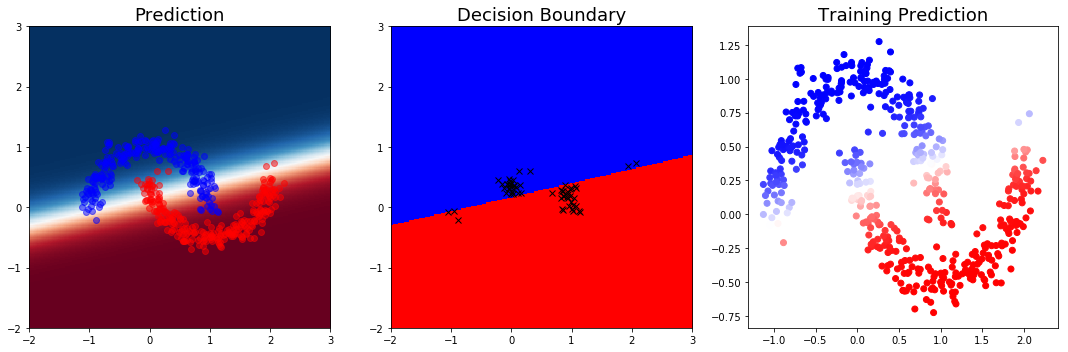

In [12]:
#--- Visualize Decision Boundary ---#
n = 250
hdom = np.linspace(-2,3,n) 
vdom = np.linspace(-2,3,n) 
HH, VV  = np.meshgrid(hdom,vdom)

XPred = np.c_[HH.ravel(), VV.ravel()]
yPred = perceptron.predict(XPred)
yTrain = perceptron.predict(X).ravel()
yTrainC = yTrain > 0.5

yPred = np.reshape(yPred,(n,n))

# Prediction Figure
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(yPred, cmap='RdBu_r', origin='lower', extent=(-2, 3, -2, 3))
plt.plot(X[y==0,0],X[y==0,1],'ob',alpha=0.5)
plt.plot(X[y==1,0],X[y==1,1],'or', alpha=0.5)
plt.title('Prediction', fontsize=18)

# Decision Boundary Figure
plt.subplot(132)
plt.imshow(yPred > 0.5, cmap='bwr', origin='lower', extent=(-2, 3, -2, 3))
plt.plot(X[np.not_equal(y,yTrainC),0],X[np.not_equal(y,yTrainC),1],'xk', markeredgecolor='k')
plt.title('Decision Boundary', fontsize=18)

# Final Training Prediction
plt.subplot(133)
plt.scatter(X[:,0],X[:,1],c=yTrain, cmap='bwr')
plt.title('Training Prediction', fontsize=18)

plt.tight_layout()

#--- Display Final Test Error ---#
training_error = np.mean(np.not_equal(y,yTrainC))
print('--------\nTraining Error = %0.2f%%\n--------' % (training_error*100))

## Neural Network with Depth
----

In [13]:
#--- MLP Parameters ---#
mlp_NHidden = (10,10,10,10)
batchSize = 32
epochs=100
layers = len(mlp_NHidden)
nonlinearity = 'tanh'

#--- Create a Perceptron ---#
# Add a Dense layer and an Output layer
MLP = Sequential()

# Add the first layer
MLP.add(Dense(mlp_NHidden[0], input_dim=2, activation=nonlinearity))

# Add remaining intermediate layers
for l in range(1,layers):
    MLP.add(Dense(mlp_NHidden[l], activation=nonlinearity))

# Add final layer
MLP.add(Dense(1, activation='sigmoid'))

# Decide on the metrics for the model
MLP.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit to the training data
mlp_history = MLP.fit(X, y, epochs=epochs, batch_size=batchSize)

Epoch 1/100
500/500 [==============================] - 0s - loss: 0.6377 - acc: 0.6940     
Epoch 2/100
500/500 [==============================] - 0s - loss: 0.5306 - acc: 0.8720     
Epoch 3/100
500/500 [==============================] - 0s - loss: 0.4533 - acc: 0.8700     
Epoch 4/100
500/500 [==============================] - 0s - loss: 0.3971 - acc: 0.8720     
Epoch 5/100
500/500 [==============================] - 0s - loss: 0.3572 - acc: 0.8720     
Epoch 6/100
500/500 [==============================] - 0s - loss: 0.3295 - acc: 0.8740     

--------
Training Error = 0.40%
--------


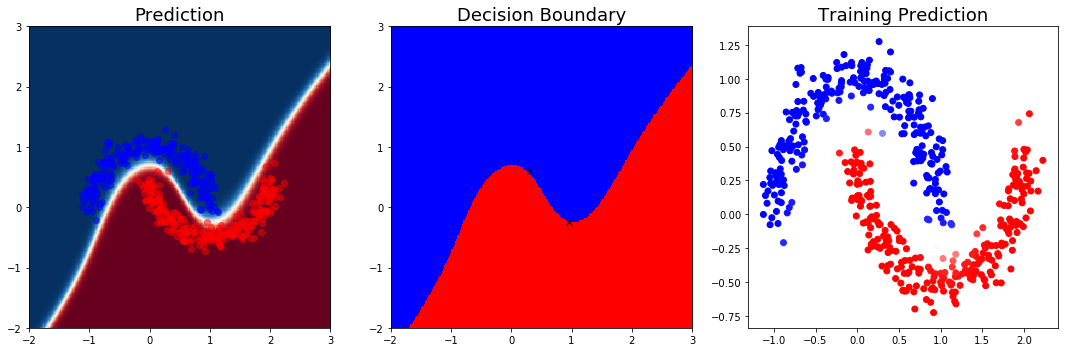

In [14]:
#--- Visualize Decision Boundary ---#
n = 250
hdom = np.linspace(-2,3,n) 
vdom = np.linspace(-2,3,n) 
HH, VV  = np.meshgrid(hdom,vdom)

XPred = np.c_[HH.ravel(), VV.ravel()]
yPred = MLP.predict(XPred)
yTrain = MLP.predict(X).ravel()
yTrainC = yTrain > 0.5

yPred = np.reshape(yPred,(n,n))

# Prediction Figure
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(yPred, cmap='RdBu_r', origin='lower', extent=(-2, 3, -2, 3))
plt.plot(X[y==0,0],X[y==0,1],'ob',alpha=0.5)
plt.plot(X[y==1,0],X[y==1,1],'or', alpha=0.5)
plt.title('Prediction', fontsize=18)

# Decision Boundary Figure
plt.subplot(132)
plt.imshow(yPred > 0.5, cmap='bwr', origin='lower', extent=(-2, 3, -2, 3))
plt.plot(X[np.not_equal(y,yTrainC),0],X[np.not_equal(y,yTrainC),1],'xk', markeredgecolor='k')
plt.title('Decision Boundary', fontsize=18)

# Final Training Prediction
plt.subplot(133)
plt.scatter(X[:,0],X[:,1],c=yTrain, cmap='bwr')
plt.title('Training Prediction', fontsize=18)

plt.tight_layout()

#--- Display Final Test Error ---#
training_error = np.mean(np.not_equal(y,yTrainC))
print('--------\nTraining Error = %0.2f%%\n--------' % (training_error*100))

1-Layer # Parmeters:     8001
Deep Model # Parmeters:  371


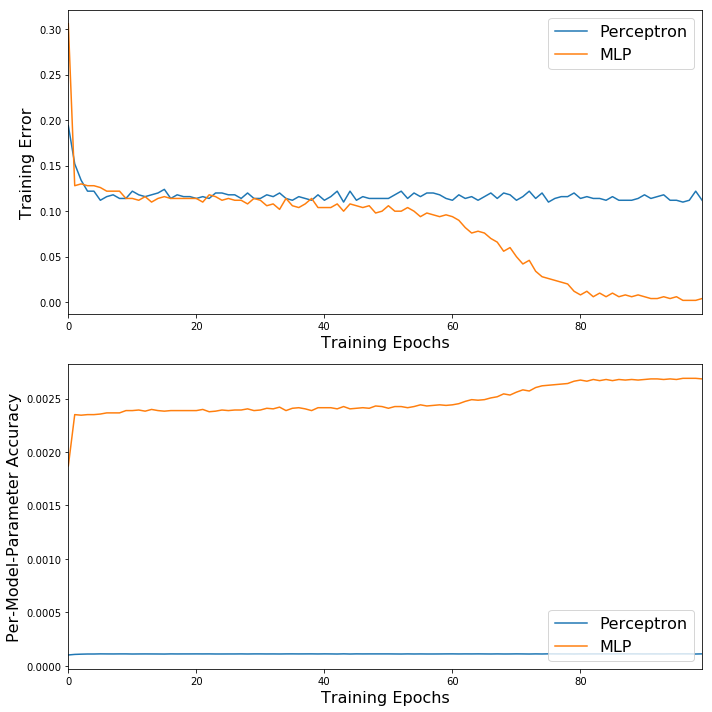

In [17]:
#--- Comparison ---#
perceptron_nparams = 2*perceptron_NHidden + perceptron_NHidden + perceptron_NHidden + 1
mlp_nparams = 0
for layer in MLP.layers:
    # Sum together  weights------------------------      and biases ------------------------
    #                         /                    \                    /                   \
    mlp_nparams += np.asarray(layer.get_weights()[0]).size + np.asarray(layer.get_weights()[1]).size
    


p_training_err = 1 - np.asarray(p_history.history['acc'])
mlp_training_err = 1 - np.asarray(mlp_history.history['acc'])

p_training_nacc = np.asarray(p_history.history['acc']) / perceptron_nparams
mlp_training_nacc = np.asarray(mlp_history.history['acc']) / mlp_nparams

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(p_training_err,   label='Perceptron')
plt.plot(mlp_training_err, label='MLP')
plt.xlabel('Training Epochs', fontsize=16)
plt.ylabel('Training Error', fontsize=16)
plt.xlim((0,epochs-1))
plt.legend(loc=1, fontsize=16)

plt.subplot(212)
plt.plot(p_training_nacc,   label='Perceptron')
plt.plot(mlp_training_nacc, label='MLP')
plt.xlabel('Training Epochs', fontsize=16)
plt.ylabel('Per-Model-Parameter Accuracy', fontsize=16)
plt.xlim((0,epochs-1))
plt.legend(loc=4, fontsize=16)

plt.tight_layout()

print('1-Layer # Parmeters:    ', perceptron_nparams)
print('Deep Model # Parmeters: ', mlp_nparams)

## Auto-Encoder
---